In [1]:
import pandas as pd

file_path = "../data/chipotle.tsv"
chipo = pd.read_csv(file_path, sep = '\t')

print(chipo.shape)
print(chipo.info())

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [2]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [3]:
chipo['order_id'] = chipo['order_id'].astype('str')    # astype() 변환
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [4]:
chipo_most = chipo.groupby('item_name')['quantity'].count().sort_values(ascending = False)
chipo_most

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


In [5]:
chipo_item = chipo['item_name'].unique()
print(len(chipo_item))

50


<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\yelin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


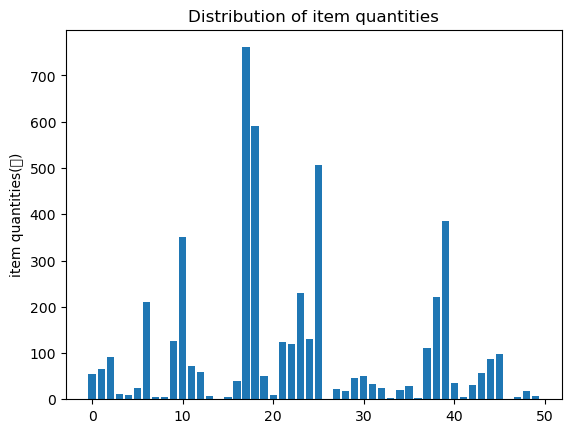

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

chipo_most_nsort = chipo.groupby('item_name')['quantity'].sum()    # count() 와 같음
item_names = chipo_most_nsort.index.tolist()
x_pos = np.arange(len(item_names))
item_quantities = chipo_most_nsort.values.tolist()    # 계산된 값들을 불러올 때 : values

plt.bar(x_pos, item_quantities, align = 'center')
plt.ylabel('item quantities(개)')
plt.title('Distribution of item quantities')
plt.show

In [7]:
chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))    # $문자열 -> 수치화
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [8]:
price_per_id = chipo.groupby('order_id')['item_price'].sum()
price_per_id.describe()

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

In [9]:
chipo_one_item = chipo[chipo['quantity'] == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.describe()

,quantity,item_price
count,50.0,50.000000
mean,1.0,6.572200
std,0.0,2.947196
min,1.0,1.090000
25%,1.0,3.097500
50%,1.0,8.490000
75%,1.0,8.690000
max,1.0,9.390000
